### Miguel Caçador Peixoto

### A92838

Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin, exp
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from copy import copy
from numpy import sin, cos, pi
import random
from numpy import loadtxt
from numpy import arange
from functools import partial

%matplotlib inline

#### Ex 1

In [2]:
def factorial(n):

    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

##### a)

In [3]:
factorial(200)

788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000

##### b)

In [4]:
factorial(float(200))

inf

Observa-se que ao usar uma variavel de virgula flutuante, a função definida anteriormente deixa de funcionar - retorna infinito.

In [5]:
n = 200

for n in range(n):
    n = float(n)
    print(factorial(n))

1
1.0
2.0
6.0
24.0
120.0
720.0
5040.0
40320.0
362880.0
3628800.0
39916800.0
479001600.0
6227020800.0
87178291200.0
1307674368000.0
20922789888000.0
355687428096000.0
6402373705728000.0
1.21645100408832e+17
2.43290200817664e+18
5.109094217170944e+19
1.1240007277776077e+21
2.585201673888498e+22
6.204484017332394e+23
1.5511210043330986e+25
4.0329146112660565e+26
1.0888869450418352e+28
3.0488834461171384e+29
8.841761993739701e+30
2.6525285981219103e+32
8.222838654177922e+33
2.631308369336935e+35
8.683317618811886e+36
2.9523279903960412e+38
1.0333147966386144e+40
3.719933267899012e+41
1.3763753091226343e+43
5.23022617466601e+44
2.0397882081197442e+46
8.159152832478977e+47
3.3452526613163803e+49
1.4050061177528798e+51
6.041526306337383e+52
2.6582715747884485e+54
1.1962222086548019e+56
5.5026221598120885e+57
2.5862324151116818e+59
1.2413915592536073e+61
6.082818640342675e+62
3.0414093201713376e+64
1.5511187532873822e+66
8.065817517094388e+67
4.2748832840600255e+69
2.308436973392414e+71
1.2696

Abrindo o output anterior num editor de texto, observa-se que a função começa a retornar inf depois da iteração 171, sendo o ultimo numero antes do inf, 7.257415615307994e+306.

Sabendo que a ordem de grandeza do resultado da alinea a é de

In [6]:
import math
math.floor(math.log10(788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000))

374

ou seja, é ainda superior ao valor de 7.257415615307994e+306, surge a questao de porque que ao usar virgula flutuante, atingimos um limite de ordem de grandeza?

Na alinea a) usamos inteiros ou seja, não nos precisamos de preocupar com a mantissa em si. Reservando 

#### Ex 2

In [7]:
def f(t):
    if int(2*t) % 2 == 0:
        return 1
    else:
        return -1

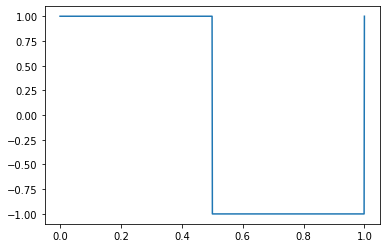

In [8]:
# Array com 1000 elementos de 0 a 1 - 1 ciclo, como mostra o grafico
x = np.linspace(0, 1, 1000)
y = np.array([f(t) for t in x])
plt.plot(x, y)
plt.show()

C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


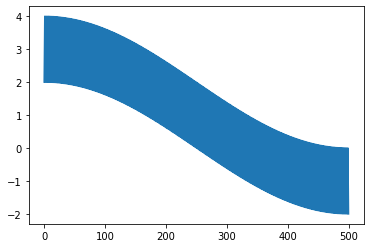

In [9]:
# Transformação de fourier
Y = np.fft.rfft(y)
plt.plot(Y)
plt.show()

C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


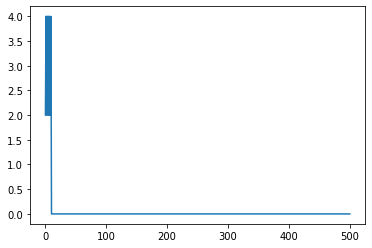

In [10]:
# Considerar apenas os primeiros 10 coeficientes
Y[10:] = 0
plt.plot(Y)
plt.show()

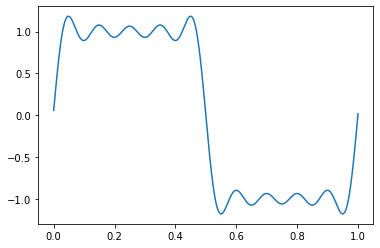

In [11]:
# Reconstruir o sinal usando a inversa
y_inversa = np.fft.irfft(Y)
plt.plot(x, y_inversa)
plt.show()

Ondas quadradas necessitam de uma soma infinita de harmonicos para serem, de facto, representadas.

Neste caso começamos com uma onda quadrada definida por uma função, convertemos para o seu espectro, eliminamos a maior parte dos coeficientes e, no final, (tentamos) reconstruir a onda. Visto que, apenas temos um numero limitado de coeficientes, a representação da onda quadrada obviamente não será exata, evidenciando na sua representação no grafico a cima os diferentes sinais da qual é constituida.

Nota adicional: 
Na representação a cima até é visivel o fenómeno de Gibbs - As somas de fourier, quando encaradas com uma descontinuidade (o salto de 0 a 1 e vice versa) tendem a fazer um overshoot da função.

#### Ex 3

##### a)

In [12]:
# Definir integração por Simpson
def integrate_simpson(f, a0, b0, n):
    # f     - Função a integrar
    # a0,b0 - limites de integração
    # n     - numero de subintervalos

    # Passo
    h = (b0-a0)/n

    # Valor a retornar
    retorno = 0
    for i in range(0, n+1, 2):
        # a e b são os extremos do retangulo
        a = a0+i*h
        b = a0+(i+1)*h
        
        ## Simpson
        retorno += f(a) + 4*f((a+b)/2) + f(b)


    return h/3 * retorno # Divido por 3 em vez de 6 pois ando de 2 em 2 (ver range)

In [13]:
# Definir a função de bessel
def J(theta, order, alpha):
    return (1/pi) * cos(order * theta - alpha * sin(theta))

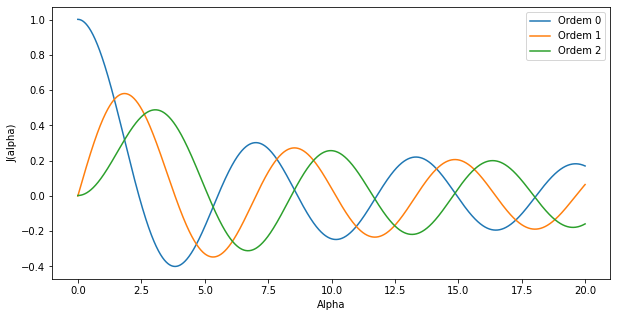

In [14]:
# Inicializar figura e o eixo dos x (alphas neste caso)
plt.figure(figsize=(10, 5))
x = np.arange(0, 20, 0.01)

# Para cada ordem
for order in [0, 1, 2]:
    # inicializar a lista que ira conter
    # os valores de J(theta, order, alpha)
    y = []

    # Para cada alpha
    for alpha in x:
        # Integrar no ponto alpha com Simpson (N=1000 como especificado)
        y.append(integrate_simpson(partial(J, order=order, alpha=alpha), 0, pi, 1000))
    
    # Dar plot ao grafico da ordem especificada
    plt.plot(x, y, label=f'Ordem {order}')

# Labels e legenda
plt.xlabel('Alpha')
plt.ylabel('J(alpha)')
plt.legend()
plt.show()
        

##### b)

In [15]:
# Definir constantes
lam = 500*10**-9
k = 2*pi/lam

# Definir intensidade
def I(r):
    J1 = integrate_simpson(partial(J, order=1, alpha=(k*r)), 0, pi, 1000)
    return (J1/(k*r))**2

In [16]:
from math import sqrt, sin, pi 
from numpy import empty 
from pylab import imshow, gray, show, colorbar

# Definir prop. da imagem
side = (1e-6) * 2 # Queremos valores de r de 0 a 1e-6, logo o lado terá de ser 2x esse valor
points = 100
spacing = side/points
xi = empty([points, points], float)

# Definir oridem
x0, y0 = side/2, side/2

# Para cada ponto
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j

        # Calcular o r
        r = sqrt((x-x0)**2 + (y-y0)**2)

        # Calcular o I(r)
        if r != 0:
            xi[i, j] = I(r)
        else:
            xi[i, j] = (1/2)**2 # Nota1: 1/4 é o valor da intensidade da onda no limite qnd r=0

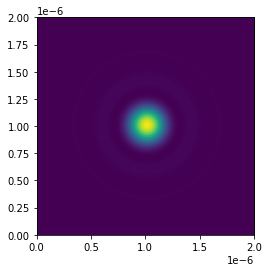

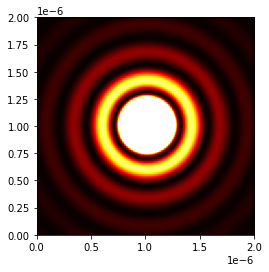

In [17]:
plt.imshow(xi, origin="lower", extent=[0, side, 0, side])
plt.show()

# Com os arg especificados no teste (??)
plt.imshow(xi, origin="lower", extent=[0, side, 0, side], vmax=0.005, cmap="hot")
plt.show()

Como esperado, conseguimos ver os aneis de difração :)

#### Ex 4

In [24]:
# Definir Runge-Kutta de ordem 4
def rk4_vect(start, end, N, r0, f):
    # start, end - intervalo de integracao
    # N         - numero de pontos
    # r0        - vetor inicial
    # f         - funcao a integrar


    N = int(N)
    r0 = np.array(r0, dtype=np.float64)
    rpoints = []
    
    r = r0
    t = start
    h = (end - start)/N

    for _ in range(N):
        t += h
        rpoints.append(r.copy())
        k1 = h*f(r, t)
        k2 = h*f(r + k1/2, t + h/2)
        k3 = h*f(r + k2/2, t + h/2)
        k4 = h*f(r + k3, t + h)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
        
    # Return t and r values
    return np.linspace(start, end, N), np.array(rpoints, dtype=np.float64).T

##### a)

In [25]:
# Definir constantes
m = 1.
R = 8*10**-2
theta = pi/6
ro = 1.22
C = 0.47
g = 9.8 # m/s^2

v0 = 100. # m/s

xv0 = v0*cos(theta)
yv0 = v0*sin(theta)

# Assumo isto
x0, y0 = 0, 0

# Vetor inicial
r0 = [x0, y0, xv0, yv0]

print("Vetor inicial:", r0)

Vetor inicial: [0, 0, 86.60254037844388, 49.99999999999999]


In [26]:
def f(r, t, R, m, ro, C, g):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]

    ax = -((pi*(R**2)*ro*C)/(2*m)) * vx * sqrt(vx**2 + vy**2)
    ay = -g-((pi*(R**2)*ro*C)/(2*m)) * vy * sqrt(vx**2 + vy**2)

    return np.array([vx, vy, ax, ay], dtype=np.float64)

In [27]:
t, r = rk4_vect(0, 10, 1e4, [x0, y0, xv0, yv0], partial(f, R=R, m=m, ro=ro, C=C, g=g))

##### b)

Grafico da altura em função do tempo

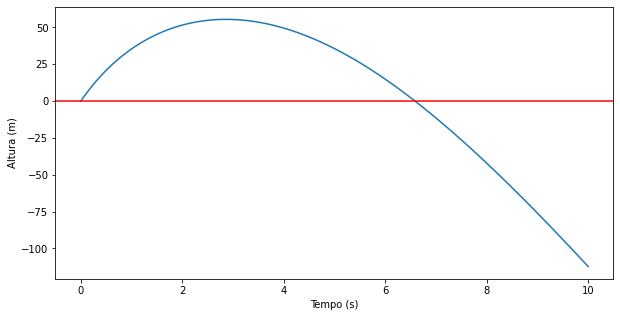

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(t, r[1])
plt.axhline(y=0, color='r')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (m)')
plt.show()

Por analise do grafico a cima, podemos estimar que a bola de canhão caiu em Tcaiu = 6,5s

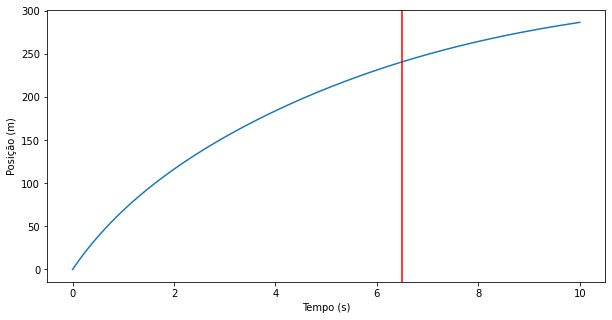

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(t, r[0])
plt.axvline(x=6.5, color='r')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.show()

Desta forma, podemos estimar que a bola de canhão percorreu 225 metros